In [1]:
from lib.Blackjack import Table, Dealer, Player, DealerDecisionModel
from lib.decision_models.FixedStrategy import FixedStrategy
from lib.decision_models.FixedWithCardCounting import FixedWithCardCounting
from lib.decision_models.QDecisionModel import QDecisionModel
import tensorflow as tf

from matplotlib import pyplot as plt

2023-08-06 22:50:53.994719: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 22:50:54.166214: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-06 22:50:54.166233: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-06 22:50:55.038568: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:

dealer = Dealer()
table = Table(dealer, 12, top_up_rate = 0.1)

table.add_player(Player(DealerDecisionModel()))
table.add_player(Player(FixedStrategy()))
table.add_player(Player(FixedWithCardCounting()))
table.add_player(Player(QDecisionModel(tf.keras.models.load_model("model/model_saved"))))

2023-08-06 22:50:56.678753: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-06 22:50:56.678786: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-06 22:50:56.678822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (acer-Aspire-F5-573G): /proc/driver/nvidia/version does not exist
2023-08-06 22:50:56.679094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
balances = [[], [], [], []]

for i in range(1000): 
    table.play_round()
    for i in range(len(table.players)): 
        balances[i].append(table.players[i].balance)

In [4]:

for i in range(len(table.players)): 
    print(f"player {i}: {table.players[i].balance}")

player 0: -155
player 1: 7
player 2: -56
player 3: 29


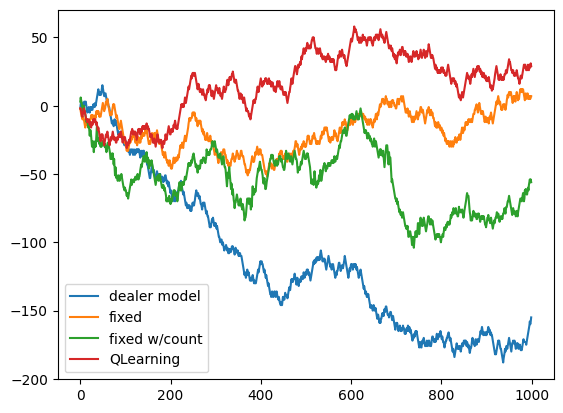

In [5]:
#for i in range(len(table.players)): 
#    plt.plot(balances[i], label=f"player {i}")
plt.plot(balances[0], label="dealer model")
plt.plot(balances[1], label="fixed")
plt.plot(balances[2], label="fixed w/count")
plt.plot(balances[3], label="QLearning")
plt.legend()
plt.show()